Deep learning

1. 이미지 분석을 위한 CNN
2. 텍스트 분석을 위한 RNN

1. CNN

CIFAR-10 데이터셋

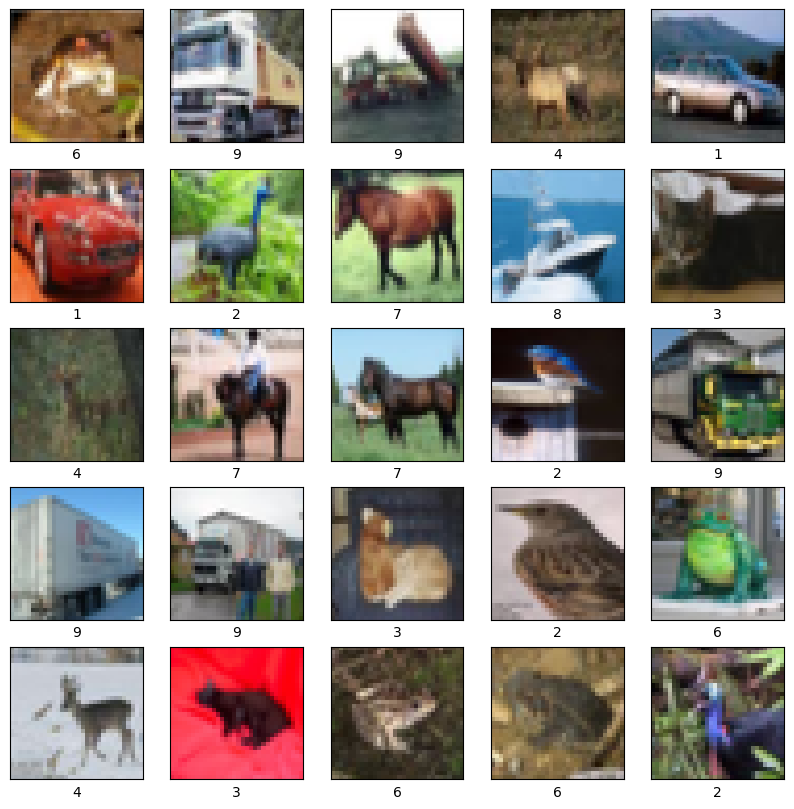

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋을 로드합니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 클래스 이름을 정의합니다. CIFAR-10 데이터셋의 클래스는 0부터 9까지 숫자입니다.
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 이미지를 표시합니다.
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i][0])
    # plt.xlabel(class_names[y_train[i][0]])
plt.show()


Epoch 1/10
1250/1250 [==============================] - 59s 45ms/step - loss: 1.5757 - accuracy: 0.4232 - val_loss: 1.3266 - val_accuracy: 0.5222
Epoch 2/10
1250/1250 [==============================] - 54s 44ms/step - loss: 1.1759 - accuracy: 0.5842 - val_loss: 1.0660 - val_accuracy: 0.6246
Epoch 3/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.0214 - accuracy: 0.6423 - val_loss: 1.0034 - val_accuracy: 0.6498
Epoch 4/10
1250/1250 [==============================] - 54s 44ms/step - loss: 0.9273 - accuracy: 0.6765 - val_loss: 1.0048 - val_accuracy: 0.6491
Epoch 5/10
1250/1250 [==============================] - 63s 51ms/step - loss: 0.8543 - accuracy: 0.7000 - val_loss: 0.9078 - val_accuracy: 0.6863
Epoch 6/10
1250/1250 [==============================] - 79s 63ms/step - loss: 0.7982 - accuracy: 0.7203 - val_loss: 0.8760 - val_accuracy: 0.6993
Epoch 7/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.7462 - accuracy: 0.7383 - val_loss: 0.8825 -

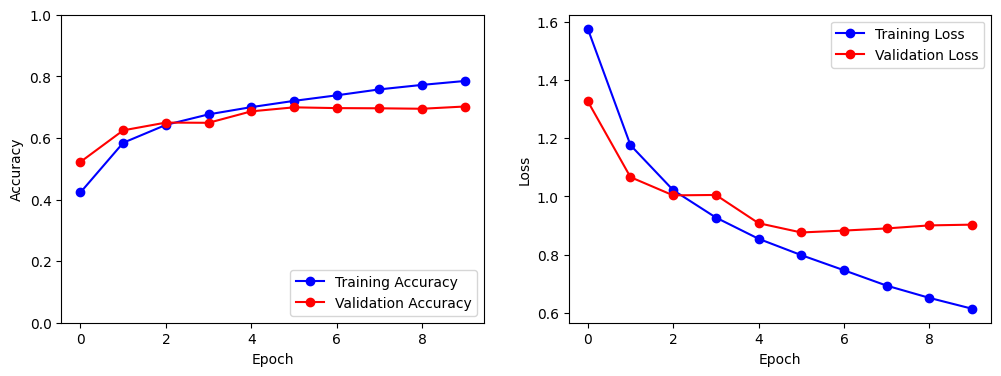

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

# 데이터셋 로드 (예: CIFAR-10)
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# 이미지 데이터 정규화 (0-1 범위로 스케일 조정)
train_images, test_images = train_images / 255.0, test_images / 255.0

# 데이터를 training, validation, test 세트로 분할
# 보통 일반적으로 60% training, 20% validation, 20% test로 나눕니다.
split = 0.2
split_idx = int(len(train_images) * split)
val_images, val_labels = train_images[:split_idx], train_labels[:split_idx]
train_images, train_labels = train_images[split_idx:], train_labels[split_idx:]

# CNN 모델 정의
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10개의 클래스 (CIFAR-10 데이터셋)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# 정확도 및 손실 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'bo-', label='Training Loss')
plt.plot(history.history['val_loss'], 'ro-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [3]:
# 모델 평가 (test 세트로)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 5s 16ms/step - loss: 0.9084 - accuracy: 0.6997
Test accuracy: 0.6996999979019165


313/313 [==============================] - 4s 13ms/step


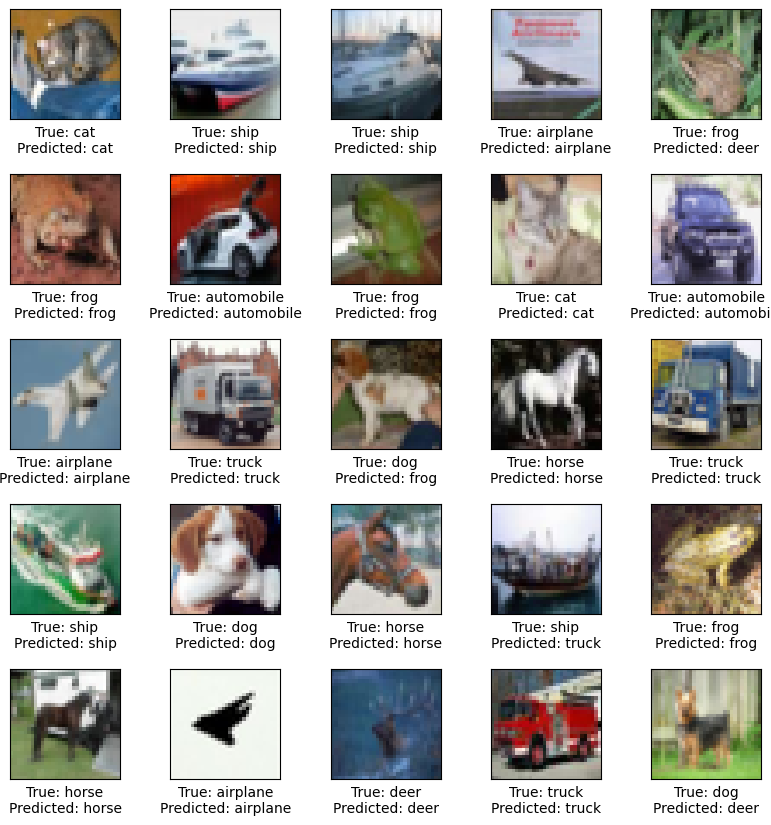

In [5]:
import numpy as np

# CIFAR-10 클래스 레이블
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# # 테스트 데이터 예측
predictions = model.predict(test_images)

# 무작위로 테스트 이미지 선택
num_images = 25

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    true_label = class_names[test_labels[i][0]]
    predicted_label = class_names[np.argmax(predictions[i])]
    plt.xlabel(f'True: {true_label}\nPredicted: {predicted_label}')

# 행 간격을 늘립니다
plt.subplots_adjust(hspace=0.5)
plt.show()


2. RNN

IMDb 데이터셋

감성 분류를 연습하기 위해 자주 사용하는 영어 데이터로, 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블로 구성되어 있다.

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

# 데이터 로드 (IMDb 데이터셋)
num_words = 10000  # 가장 자주 등장하는 상위 10,000 단어 선택
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# # 데이터 전처리
# max_review_length = 500  # 리뷰 길이를 500으로 제한
# x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
# x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

# 데이터 분할 (training, validation, test)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 데이터 크기 확인
print("Train Data Shape:", x_train.shape)
print("Validation Data Shape:", x_val.shape)
print("Test Data Shape:", x_test.shape)
print("카테고리:", y_train)

Train Data Shape: (20000,)
Validation Data Shape: (5000,)
Test Data Shape: (25000,)
카테고리: [0 0 0 ... 0 0 1]


In [8]:
print('첫번째 훈련용 리뷰 :',x_train[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train[0])

첫번째 훈련용 리뷰 : [1, 73, 89, 81, 25, 60, 967, 6, 20, 141, 17, 14, 31, 127, 12, 60, 28, 1360, 1107, 66, 45, 6, 20, 15, 497, 8, 79, 17, 491, 8, 112, 6, 6683, 20, 17, 614, 691, 4, 436, 20, 9, 2855, 6, 762, 7, 493, 8621, 6, 185, 250, 24, 55, 2276, 5, 23, 350, 7, 15, 82, 24, 15, 821, 66, 10, 10, 45, 578, 15, 4, 20, 805, 8, 30, 17, 821, 5, 1621, 17, 614, 190, 4, 20, 9, 43, 32, 99, 1214, 18, 15, 8, 157, 46, 17, 1436, 4, 2, 5, 2, 9, 32, 1796, 5, 1214, 267, 17, 73, 17, 4413, 36, 26, 400, 43, 4562, 83, 4, 1873, 247, 74, 83, 4, 250, 540, 82, 4, 96, 4, 250, 8306, 8, 32, 4, 2, 9, 184, 3966, 13, 384, 48, 14, 16, 147, 1348, 59, 62, 69, 9420, 12, 46, 50, 9, 53, 2, 74, 1930, 11, 14, 31, 151, 10, 10, 4, 20, 9, 540, 364, 352, 5, 45, 6, 2, 589, 33, 269, 8, 2715, 142, 1621, 5, 821, 17, 73, 17, 204, 5, 2908, 19, 55, 1763, 4697, 92, 66, 104, 14, 20, 93, 76, 1488, 151, 33, 4, 58, 12, 188, 626, 151, 12, 215, 69, 224, 142, 73, 237, 6, 964, 7, 1446, 2289, 188, 626, 103, 14, 31, 10, 10, 451, 7, 1465, 5, 599, 80, 91, 

숫자로 전처리 되어있는 데이터를 다시 영어로 복구해볼까요?

In [10]:
word_index = imdb.get_word_index()
for key, value in list(word_index.items())[:10]:
    print(f'{key}: {value}')

fawn: 34701
tsukino: 52006
nunnery: 52007
sonja: 16816
vani: 63951
woods: 1408
spiders: 16115
hanging: 2345
woody: 2289
trawling: 52008


In [11]:
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()]
)
for key, value in list(reverse_word_index.items())[:10]:
    print(f'{key}: {value}')

34701: fawn
52006: tsukino
52007: nunnery
16816: sonja
63951: vani
1408: woods
16115: spiders
2345: hanging
2289: woody
52008: trawling


`num_words=10000`개의 자주 쓰이는 단어만 가져왔으므로 나머지 단어에 대해서는 값이 존재하지 않는다.
각 단어를 `joint()`으로 이어주고 단어를 못 찾은 경우에는 `'?'`으로 대체한다.

In [12]:
decode_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in x_train[0]]
)
decode_review

"? well how do you even rate a movie such as this one does it even have cinematic value really it's a movie that tries to get as close to being a snuff movie as possible basically the entire movie is purely a bunch of guys torturing a young girl not very appealing and on top of that also not that realistic really br br it's obvious that the movie tried to be as realistic and shocking as possible however the movie is just all too fake for that to work out as intended the ? and ? is all soft and fake looking as well as sounding they are often just kicking into the floor rather than into the girl obviously also the way the girl responds to all the ? is pretty tame i mean if this was real surely she would had screamed it out there is more ? than screaming in this one though br br the movie is obviously low budget and it's a ? attempt at trying to achieve something shocking and realistic as well as original and provoking with very limited resources don't really think this movie made much im

원핫인코딩

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [14]:
x_train = vectorize_sequences(x_train)
x_val = vectorize_sequences(x_val)
x_test = vectorize_sequences(x_test)

In [15]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [16]:
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [17]:
y_train

array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

모델링
* 16개의 은닉 유닛을 가진 2개의 은닉 층
* 중간에 있는 은닉층은 활상화 함수로 relu 사용
* 마지막 층은 확률을 출력하기 위해서 시그모이드 사용

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [20]:
history = model.fit(x_train,
                    y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_data=(x_val, y_val))

Epoch 1/10
157/157 [==============================] - 6s 25ms/step - loss: 0.3755 - accuracy: 0.8554 - val_loss: 0.2806 - val_accuracy: 0.8850
Epoch 2/10
157/157 [==============================] - 2s 15ms/step - loss: 0.2101 - accuracy: 0.9208 - val_loss: 0.2824 - val_accuracy: 0.8846
Epoch 3/10
157/157 [==============================] - 2s 15ms/step - loss: 0.1641 - accuracy: 0.9396 - val_loss: 0.3591 - val_accuracy: 0.8602
Epoch 4/10
157/157 [==============================] - 2s 12ms/step - loss: 0.1330 - accuracy: 0.9521 - val_loss: 0.3366 - val_accuracy: 0.8782
Epoch 5/10
157/157 [==============================] - 2s 14ms/step - loss: 0.1103 - accuracy: 0.9613 - val_loss: 0.3690 - val_accuracy: 0.8732
Epoch 6/10
157/157 [==============================] - 2s 13ms/step - loss: 0.0914 - accuracy: 0.9704 - val_loss: 0.4347 - val_accuracy: 0.8668
Epoch 7/10
157/157 [==============================] - 2s 13ms/step - loss: 0.0744 - accuracy: 0.9762 - val_loss: 0.4602 - val_accuracy: 0.8652

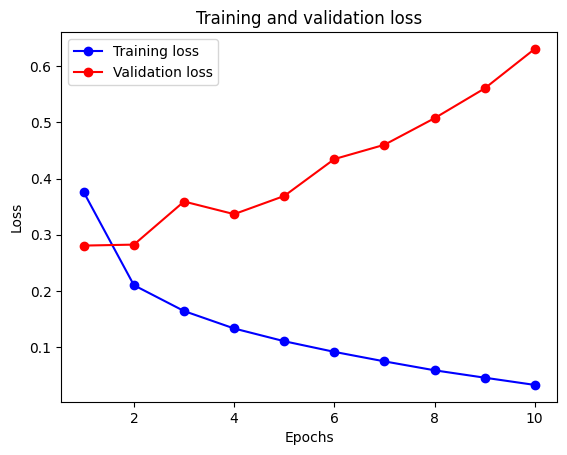

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

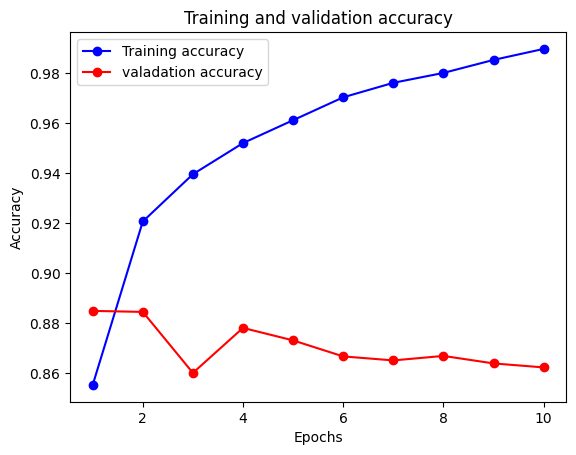

In [22]:
plt.clf() # 그래프 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label= 'valadation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

782/782 [==============================] - 4s 5ms/step - loss: 0.6741 - accuracy: 0.8519
Test Accuracy: 0.8518800139427185
